In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import random as r
from matplotlib.lines import Line2D

In [2]:
plt.style.use('../computermodernstyle.mplstyle')

In [3]:
names = [r"Weighted", r"Unweighted", r"Mean-weighted"]
edge_colours = ["#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf"]

In [4]:
weights = pd.read_csv('../../ee_to_ttbar/data/weighted_weights.csv', delimiter = ',', header=None, index_col=False).to_numpy()

## Reweight with mean

In [6]:
ref_weight_mean = np.mean(weights)
p_rejection_sampling_mean = np.random.rand(len(weights))
selected_mean = np.less(p_rejection_sampling_mean, weights/ref_weight_mean)

mean_weights = weights[selected_mean]
mean_weights[mean_weights < 1.0] = 1.0
mean_weights /= np.mean(mean_weights)

NameError: name 'p_rejection_sampling' is not defined

## Reweight with max

In [ ]:
ref_weight_max = np.max(weights)
p_rejection_sampling_max = np.random.rand(len(weights))
selected_max = np.less(p_rejection_sampling_max, weights/ref_weight_max)

max_weights = weights[selected_max]
max_weights[max_weights < 1.0] = 1.0
max_weights /= np.mean(max_weights)

In [7]:
weights_weighted = weights
weights_weighted = weights_weighted/np.mean(weights_weighted)

weights_unweighted = reweight(weights, np.amax(weights))
weights_unweighted = weights_unweighted/np.mean(weights_unweighted)

weights_mean_weighted = reweight(weights, np.mean(weights))
weights_mean_weighted = weights_mean_weighted/np.mean(weights_mean_weighted)

Reference weight 1.9960300598e-09
Lost a fraction 0.9917407 of the original events
Reference weight 1.6552020758350617e-11
Lost a fraction 0.2921972 of the original events


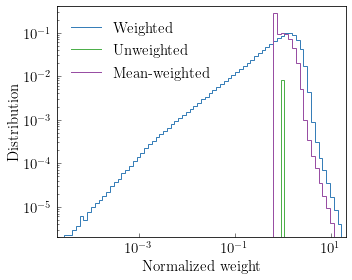

In [14]:
plt.figure().set_size_inches(5,4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(2e-5, 20)
plt.ylim(0.000002,0.4)
n_bins = 100
bins = np.logspace(np.log10(np.amin(weights_weighted)), np.log10(np.amax(weights_weighted)), n_bins+1)
plt.hist(weights_weighted, bins=bins,
    edgecolor=edge_colours[0], label=names[0], histtype="step", weights=np.ones_like(weights_weighted)/len(weights_weighted))
plt.hist(weights_unweighted, bins=bins,
    edgecolor=edge_colours[1], label=names[1], histtype="step", weights=np.ones_like(weights_unweighted)/len(weights_weighted))
plt.hist(weights_mean_weighted, bins=bins,
    edgecolor=edge_colours[2], label=names[2], histtype="step", weights=np.ones_like(weights_mean_weighted)/len(weights_weighted))

handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
plt.legend(loc=2, handles=new_handles, labels=labels) 
plt.gca().set_xlabel(r'Normalized weight')
plt.gca().set_ylabel(r'Distribution')
plt.savefig('weight_distribution.pdf', format='pdf', dpi=1000, bbox_inches = "tight")